In [1]:
import os

def count_images_in_folders(folder_path):
    # Initialize a dictionary to store the count of images in each folder
    image_counts = {}

    # List all subdirectories in the dataset path
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            # Count the number of files (images) in the subdirectory
            image_counts[subdir] = len(os.listdir(subdir_path))
    
    return image_counts

'''This part of code is used to check for the number of images in the main data folder.'''

# Define the path to the dataset directory
dataset_path = 'data'

# Get the image counts
image_counts = count_images_in_folders(dataset_path)

# Print the image counts
for folder, count in image_counts.items():
    print(f'Folder: {folder}, Image Count: {count}')


Folder: drive, Image Count: 1224
Folder: legglance-flick, Image Count: 1120
Folder: pullshot, Image Count: 1260
Folder: sweep, Image Count: 1120


In [2]:
path='data'
# list down the folders
folders = os.listdir(path)
print(folders)
'''Here is we are checking the number of different shots that are present in the dataset'''

['drive', 'legglance-flick', 'pullshot', 'sweep']


'Here is we are checking the number of different shots that are present in the dataset'

In [3]:
# for dealing with images
import cv2
# create lists
images  = []
labels  = []
# for each folder
for folder in folders:
    # list down image names
    names=os.listdir(path+'/'+folder)
    # for each image
    for name in names:
        # read an image
        each_image = path + '/' + folder +  '/' + name
        img=cv2.imread(each_image)
        # append image to list
        images.append(img)
        # append folder name (type of shot) to list
        labels.append(folder)


'''This code will help us to go into the folders and load the data into python along with the labels

the "images" list consists of all the image in the form of arrays
the "labels" list consists of all the names of the shots of each array
'''

'This code will help us to go into the folders and load the data into python along with the labels\n\nthe "images" list consists of all the image in the form of arrays\nthe "labels" list consists of all the names of the shots of each array\n'

'This code goes into the data and then goes into individual folder of each shot and randomely selects 5 images to display\nthis is done for all the shots to display five random images\n\neverytime this code is run, 5 new images will be displayed'

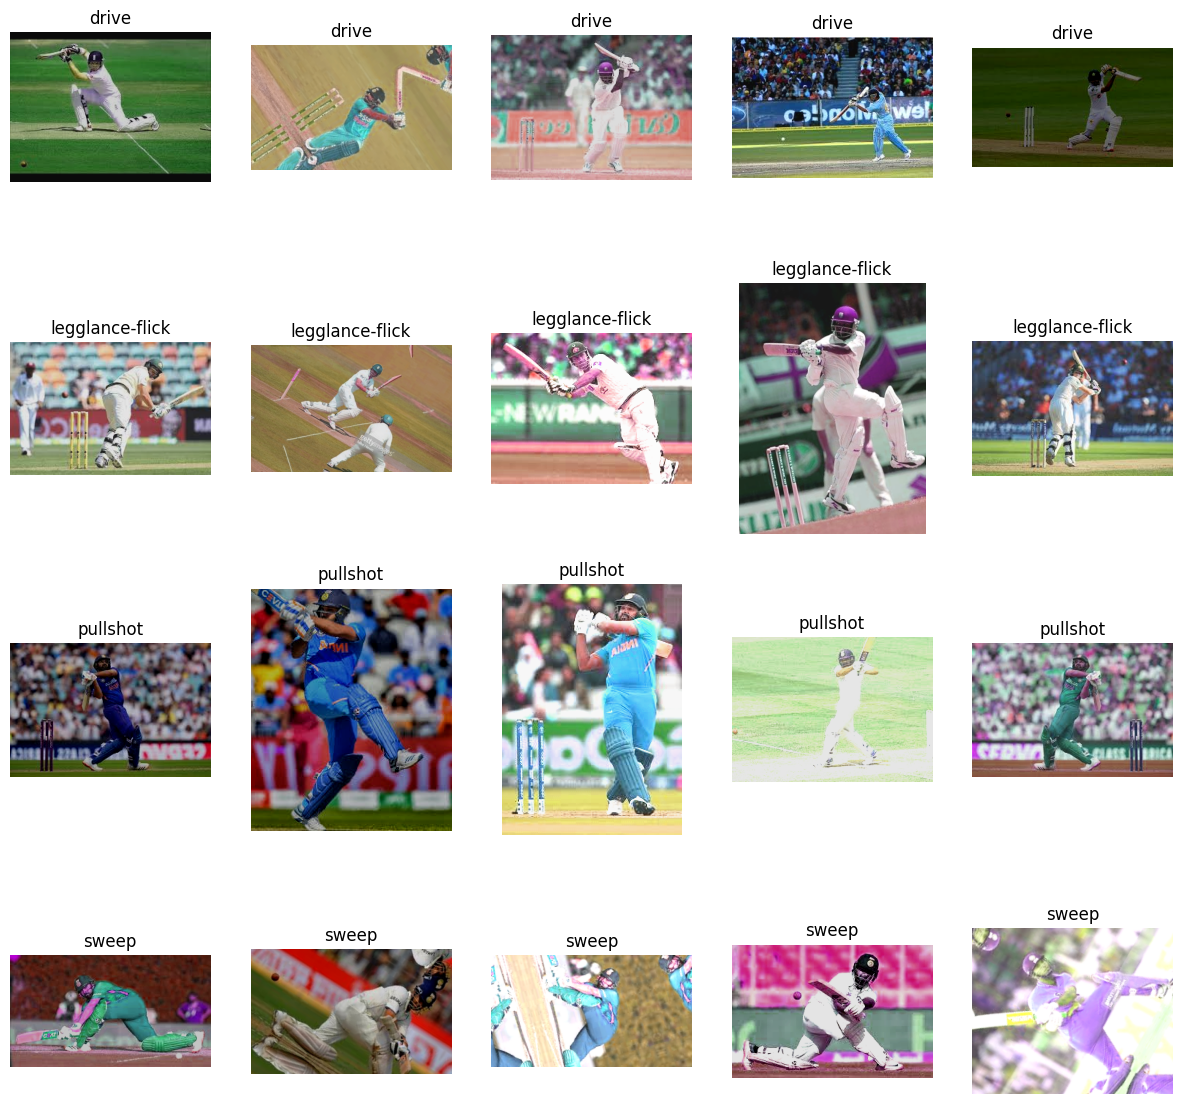

In [4]:
# visualization library
import matplotlib.pyplot as plt
# for randomness
import random
# create subplots with 4 rows and 5 columns
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15,15))
# randomly display 5 images for each shot for each folder
for i in range(len(folders)):
    # read image names
    names=os.listdir(path+'/'+folders[i])
    # randomly select 5 image names
    names= random.sample(names, 5)
    # for each image
    for j in range(len(names)):
      # read an image
      img = cv2.imread(path+ '/' + folders[i]+ '/' +names[j])
      # convert BGR to RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # display image
      ax[i, j].imshow(img)
      # set folder name as title
      ax[i, j].set_title(folders[i])
      # Turn off axis
      ax[i, j].axis('off')


'''This code goes into the data and then goes into individual folder of each shot and randomely selects 5 images to display
this is done for all the shots to display five random images

everytime this code is run, 5 new images will be displayed''' 

In [5]:
# image augmentation
aug_images=[]
aug_labels=[]
# for each image in training data
for idx in range(len(images)):
  # fetch an image and label
  img  = images[idx]
  label= labels[idx]
  # flip an image
  img_flip = cv2.flip(img, 1)
  # append augmented image to list
  aug_images.append(img_flip)
  # append label to list
  aug_labels.append(label)

'''In this code, we are creating new images from old images because the dataset size is not enough. 
New images are created by flipping the original images'''

'In this code, we are creating new images from old images because the dataset size is not enough. \nNew images are created by flipping the original images'

'After flipping each image, their original part (acutal) and augmented part are displayed below'

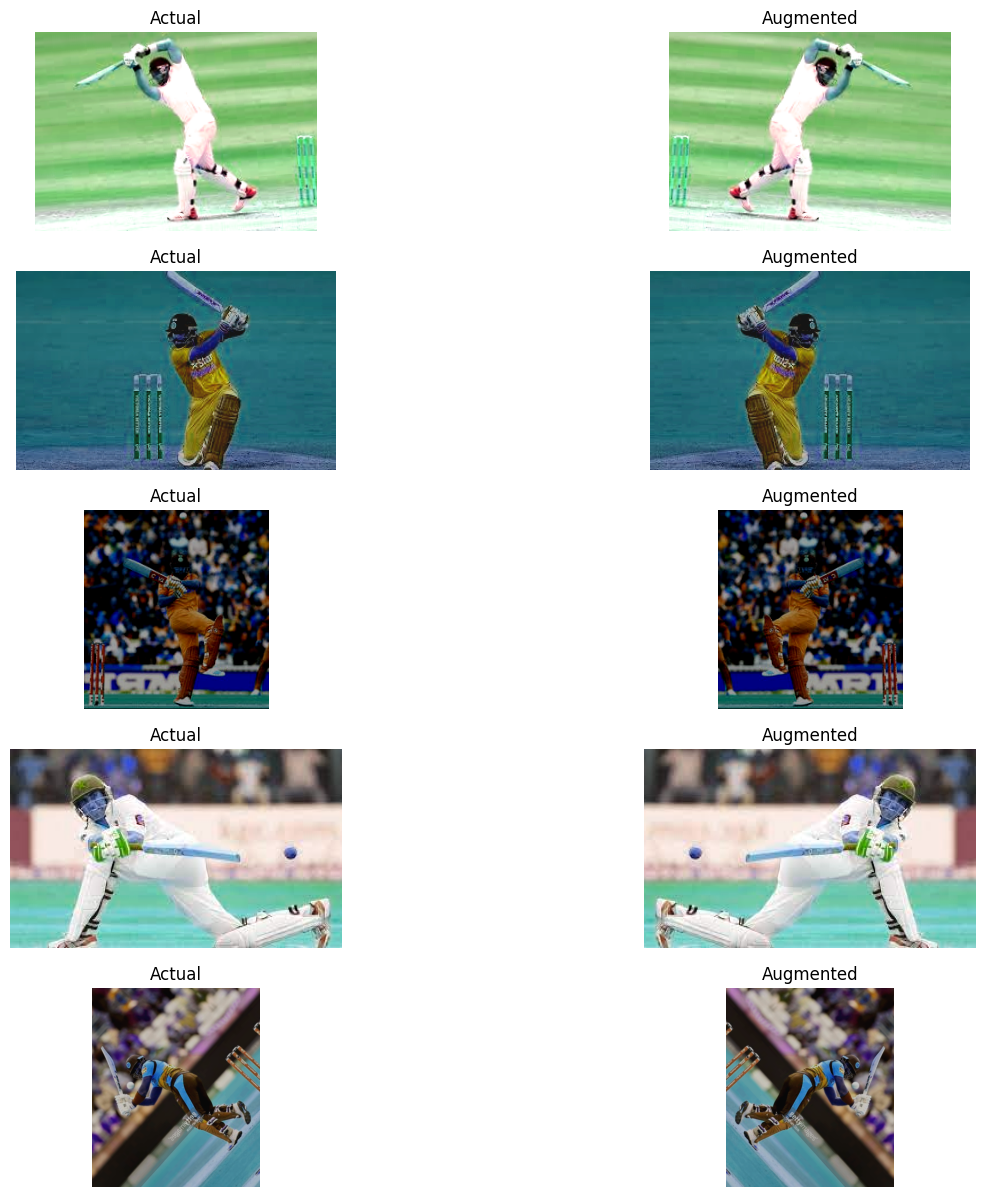

In [6]:
# display actual and augmented image for sample images
# create indices
ind = range(len(aug_images))
# randomly sample indices
ind = random.sample(ind, 5)
# create subplots with 5 rows and 2 columns
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
# for each row
for row in range(5):
  # for each column
  for col in range(2):
    # first column for actual image
    if col==0:
      # display actual image
      ax[row, col].imshow(images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Actual')
      # Turn off axis
      ax[row, col].axis('off')
    # second column for augmented image
    else:
      # display augmented image
      ax[row, col].imshow(aug_images[ ind[row] ] )
      # set title
      ax[row, col].set_title('Augmented')
      # Turn off axis
      ax[row, col].axis('off')


'''After flipping each image, their original part (acutal) and augmented part are displayed below'''

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
  (relu): ReLU()
)
Epoch [1/10], Step [1/119], Loss: 1.3961, ETA: 35.64 seconds
Epoch [1/10], Step [2/119], Loss: 2.2624, ETA: 26.43 seconds
Epoch [1/10], Step [3/119], Loss: 1.5382, ETA: 24.12 seconds
Epoch [1/10], Step [4/119], Loss: 1.6266, ETA: 21.94 seconds
Epoch [1/10], Step [5/119], Loss: 1.3005, ETA: 20.03 seconds
Epoch [1/10], Step [6/119], Loss: 1.4232, ETA: 19.44 seconds
Epoch [1/10], Step [7/119], Loss: 1.3900, ETA: 18.47 seconds
Epoch [1/10], Step [8/119], Loss: 1.3137, ETA: 17.97 seconds
Epoch [1/10], Step [9/119], Loss: 1.3542, ETA: 17.18 seconds
Epoch [1/10], Step [10/119], Loss: 1.3770, ETA: 16.74 secon

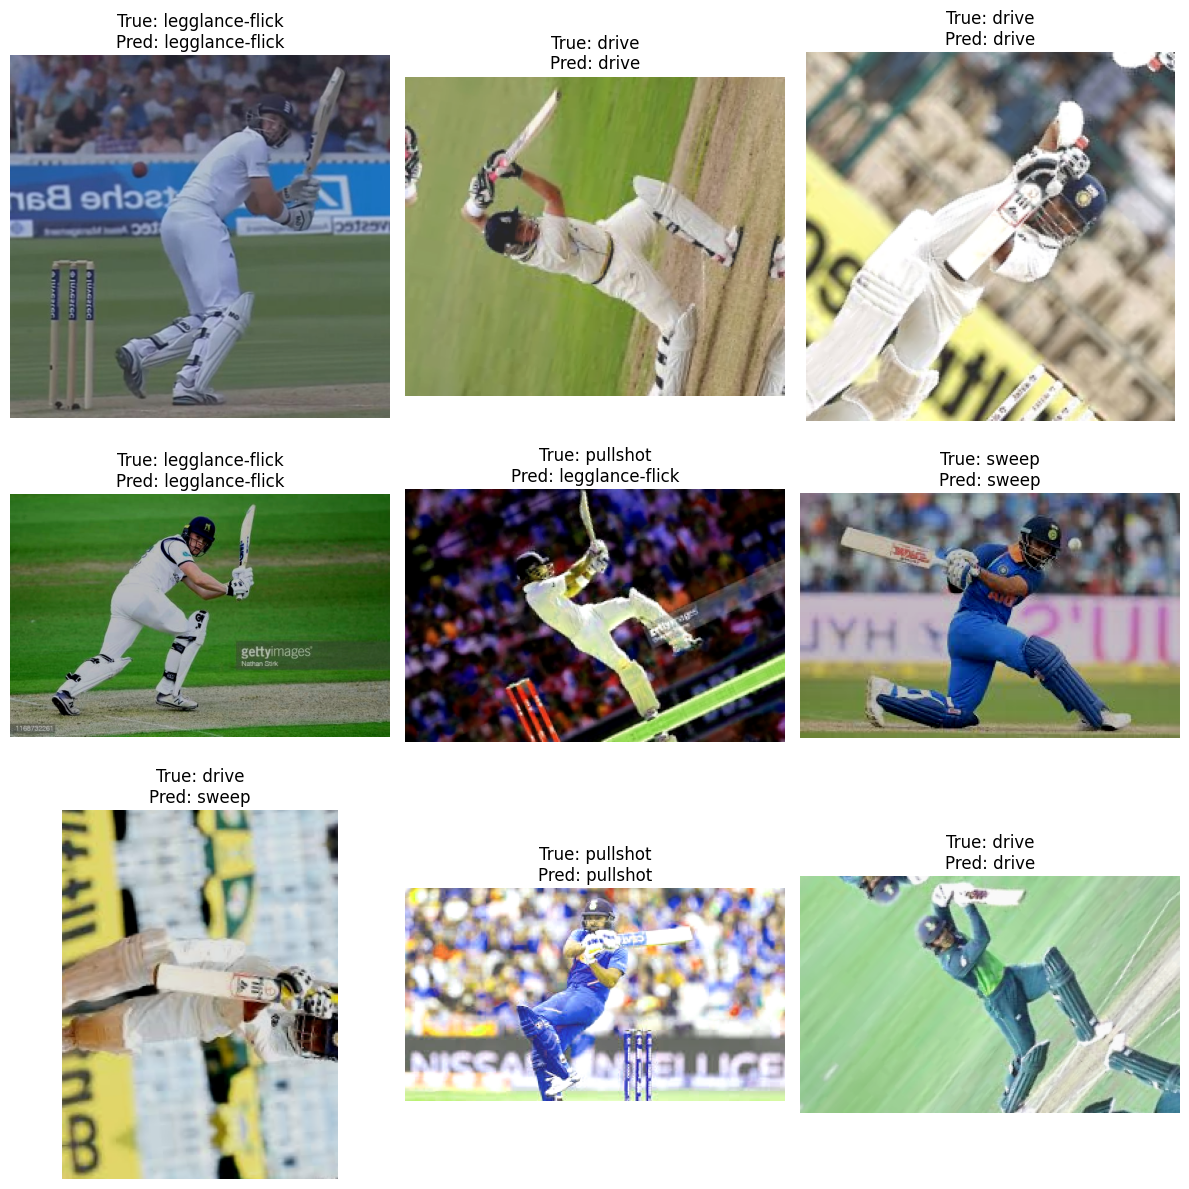

'The predictions made by the model are printed along with the images'

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os
import cv2
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Custom Dataset class
class CricketShotDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = cv2.imread(self.image_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
'''This Code is used to load the images into python and then convert them into RGB color format, for training and test data. 
If we give the number of images we need, this code will load the required number of images'''

# Function to load images from folder
def load_images_from_folder(folder_path):
    image_paths = []
    labels = []
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith(('jpg', 'jpeg', 'png')):
                    image_paths.append(file_path)
                    labels.append(subdir)
    return image_paths, labels

'''This code is used to load the into python similar to the first code.'''

# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

'''this is a step by step functin to first convert the loaded data into image format, resize all the images to 64x64,
convert the images to a tensor, 
normalize the images so that the pixel values have a consistent mean and standard deviation'''

# Load images and labels
dataset_path = 'data'  # Use the correct path to your data folder
image_paths, labels = load_images_from_folder(dataset_path)

'''Using the above code we are loading the images into python along with their labels'''

# Convert labels to numeric values
label_to_idx = {label: idx for idx, label in enumerate(set(labels))}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}
numeric_labels = [label_to_idx[label] for label in labels]


'''Here we are converting the names of the shots into dictionaries 
these dictionaries create pairs of values ex:[0:drive] this will help the algorithms to convert the english letters into numbers'''


# Split data into training and testing sets
from sklearn.model_selection import train_test_split
train_paths, test_paths, train_labels, test_labels = train_test_split(image_paths, numeric_labels, test_size=0.2, random_state=42)

'''This code will split the data into 2 parts 
first part is the training part where the algorithm will be trained 
second part is used to test the algorithm that is already trained'''

# Create datasets and dataloaders
train_dataset = CricketShotDataset(train_paths, train_labels, transform=transform)
test_dataset = CricketShotDataset(test_paths, test_labels, transform=transform)

'''Here the images that are split into training and testing are laoded into python as datasets'''

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

'''Here the datasets are converted into batches that will help the algorithm to train based on batch size'''

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
    '''Here the Convolution Neural Network is created with different layers
    after the convolution layers a normal neural network is attached for the training'''

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    ''' this code is used to send the learned weights back to the algorithm to adjust it according to prediction
    this will help the algorithm to learn step by step'''

# Initialize the model
num_classes = len(set(labels))
model = SimpleCNN(num_classes)

'''Loading the model and giving the required number of shots to be predicteds'''

# Print the model architecture
print(model)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

'''This code is used to check if a GPU is present or else a traditional CPU will be used'''

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

'''For the algorithm to learn it has to update weights based on the error, 
this optimizer will select in which direction the error is least and update the weights accordingly'''

# Training the model
num_epochs = 10 
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

        # Calculate ETA
        elapsed_time = time.time() - start_time
        batches_left = len(train_loader) - (i + 1)
        eta = elapsed_time / (i + 1) * batches_left

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, ETA: {eta:.2f} seconds')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')


'''The code defines a training loop for a CNN model over ten epochs. 
For each epoch, it sets the model to training mode and initializes the running loss and start time.
It iterates over the training DataLoader, transferring inputs and labels to the device (GPU/CPU).
Gradients are zeroed before each batch to prevent accumulation. 
The model makes predictions, calculates the loss using Cross-Entropy Loss, and updates the model parameters via backpropagation 
using the Adam optimizer. 
Running loss is accumulated, and the estimated time remaining (ETA) is calculated and displayed for each batch. 
At the end of each epoch, the average loss is printed, providing a performance summary.'''

# Save the model
torch.save(model.state_dict(), 'simple_cnn_cricket_shot_model.pth')

'''The model is saved in a dictionary format'''

# Evaluation on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

'''The code evaluates the trained CNN model on the test set. 
It sets the model to evaluation mode and initializes lists for true and predicted labels. 
Within a `torch.no_grad()` block, it iterates over the test DataLoader, moving inputs and labels to the device. 
The model makes predictions, and the predicted class with the highest score is selected. 
These predictions and true labels are collected into lists. T
his process ensures no gradients are calculated, making it memory efficient and faster for evaluation.'''

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred, target_names=[idx_to_label[i] for i in range(num_classes)])

'''Here all the required performance metrics are calculated for us to check the model performance'''

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)

'''The calculated metrics are printed'''

# Plotting some predictions
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()
for i in range(9):
    idx = random.randint(0, len(test_paths) - 1)
    img = cv2.imread(test_paths[idx])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    true_label = idx_to_label[test_labels[idx]]
    pred_label = idx_to_label[y_pred[idx]]
    axes[i].imshow(img_rgb)
    axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


'''The predictions made by the model are printed along with the images'''

In [14]:
print(classification_report(y_true, y_pred,target_names=[idx_to_label[i] for i in range(num_classes)]))

                 precision    recall  f1-score   support

legglance-flick       0.80      0.89      0.85       207
       pullshot       0.97      0.76      0.85       252
          sweep       0.82      0.91      0.86       228
          drive       0.82      0.84      0.83       258

       accuracy                           0.85       945
      macro avg       0.85      0.85      0.85       945
   weighted avg       0.86      0.85      0.85       945



In [38]:

# Define an updated CNN model
class UpdatedCNN(nn.Module):
    def __init__(self, num_classes):
        super(UpdatedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)  # Fully connected layer
        self.fc2 = nn.Linear(512, num_classes)  # Output layer

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = x.view(-1, 256 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
num_classes = len(set(labels))
model = UpdatedCNN(num_classes)

# Print the updated model architecture
print("Updated CNN Model Structure:")
print(model)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the updated model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

        # Calculate ETA
        elapsed_time = time.time() - start_time
        batches_left = len(train_loader) - (i + 1)
        eta = elapsed_time / (i + 1) * batches_left

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, ETA: {eta:.2f} seconds')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')

# Save the updated model
torch.save(model.state_dict(), 'updated_cnn_cricket_shot_model.pth')

# Evaluation on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred, target_names=[idx_to_label[i] for i in range(4)])

# Print classification report and performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)

# # Plotting some predictions
# fig, axes = plt.subplots(3, 3, figsize=(12, 12))
# axes = axes.flatten()
# for i in range(9):
#     idx = np.random.randint(0, len(test_paths))
#     img = cv2.imread(test_paths[idx])
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     true_label = idx_to_label[test_labels[idx]]
#     pred_label = idx_to_label[y_pred[idx]]
#     axes[i].imshow(img_rgb)
#     axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
#     axes[i].axis('off')
# plt.tight_layout()
# plt.show()

Updated CNN Model Structure:
UpdatedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=17, bias=True)
  (relu): ReLU()
)
Epoch [1/10], Step [1/119], Loss: 2.8359, ETA: 20.83 seconds
Epoch [1/10], Step [2/119], Loss: 2.3469, ETA: 19.17 seconds
Epoch [1/10], Step [3/119], Loss: 1.5211, ETA: 19.95 seconds
Epoch [1/10], Step [4/119], Loss: 1.5964, ETA: 19.24 seconds
Epoch [1/10], Step [5/119], Loss: 1.5138, ETA: 18.68 seconds
Epoch [1/10], Step [6/119], Loss: 1.7775, ETA: 18.40 seconds
Epoch [1/10]

In [39]:
# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred, target_names=[idx_to_label[i] for i in range(4)])

# Print classification report and performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)

# Plotting some predictions
# fig, axes = plt.subplots(3, 3, figsize=(12, 12))
# axes = axes.flatten()
# for i in range(9):
#     idx = np.random.randint(0, len(test_paths))
#     img = cv2.imread(test_paths[idx])
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     true_label = idx_to_label[test_labels[idx]]
#     pred_label = idx_to_label[y_pred[idx]]
#     axes[i].imshow(img_rgb)
#     axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
#     axes[i].axis('off')
# plt.tight_layout()
# plt.show()

Accuracy: 0.9090
Precision: 0.9107
Recall: 0.9090
F1 Score: 0.9092

Classification Report:
                  precision    recall  f1-score   support

legglance-flick       0.92      0.90      0.91       207
       pullshot       0.94      0.88      0.91       252
          sweep       0.93      0.91      0.92       228
          drive       0.86      0.94      0.90       258

       accuracy                           0.91       945
      macro avg       0.91      0.91      0.91       945
   weighted avg       0.91      0.91      0.91       945



In [40]:

# Define an updated CNN model
class Updated2CNN(nn.Module):
    def __init__(self, num_classes):
        super(Updated2CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.5)
        
        # After five convolutions and pooling operations, the image size reduces to (2x2) assuming starting size is 64x64
        self.fc1 = nn.Linear(512 * 2 * 2, 1024)  # Fully connected layer
        self.fc2 = nn.Linear(1024, num_classes)  # Output layer

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.pool(self.relu(self.conv4(x)))
        x = self.pool(self.relu(self.conv5(x)))
        x = x.view(-1, 512 * 2 * 2)  # Flatten the output for the fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
num_classes = len(set(labels))
model = Updated2CNN(num_classes)

# Print the updated model architecture
print("Updated CNN Model Structure:")
print(model)

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the updated model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()

        # Calculate ETA
        elapsed_time = time.time() - start_time
        batches_left = len(train_loader) - (i + 1)
        eta = elapsed_time / (i + 1) * batches_left

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}, ETA: {eta:.2f} seconds')

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print('Finished Training')

# Save the updated model
torch.save(model.state_dict(), 'updated_cnn_cricket_shot_model.pth')

# Evaluation on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred, target_names=[idx_to_label[i] for i in range(4)])

# Print classification report and performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:\n', report)

# # Plotting some predictions
# fig, axes = plt.subplots(3, 3, figsize=(12, 12))
# axes = axes.flatten()
# for i in range(9):
#     idx = np.random.randint(0, len(test_paths))
#     img = cv2.imread(test_paths[idx])
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     true_label = idx_to_label[test_labels[idx]]
#     pred_label = idx_to_label[y_pred[idx]]
#     axes[i].imshow(img_rgb)
#     axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
#     axes[i].axis('off')
# plt.tight_layout()
# plt.show()

Updated CNN Model Structure:
Updated2CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=17, bias=True)
  (relu): ReLU()
)
Epoch [1/10], Step [1/119], Loss: 2.8439, ETA: 17.87 seconds
Epoch [1/10], Step [2/119], Loss: 2.4084, ETA: 23.36 seconds
Epoch [1/10], Step [3/119], Loss: 1.9867, ETA: 20.63 seconds
Epoch [1/10], Step [4/119], Loss: 1.6171, ETA: 19.87 seconds
Epoch [1/10], Step [5/119], Loss: 1.6766, ETA: 19.20